## Advance Deep Learning best practices

In [1]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/gpu:0']

In [2]:
from keras import models, layers
from keras import Input

### defining the models 

In [3]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [4]:
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='sigmoid')(x)

model2 = models.Model(input_tensor, output_tensor)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


### Compiling

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [6]:
import numpy as np

x = np.random.random((1000, 64))
y = np.random.random((1000, 10))

In [8]:
hist = model.fit(x, y, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 0s 43us/step - loss: 11.6703
Epoch 2/10
1000/1000 [==============================] - 0s 32us/step - loss: 11.5907
Epoch 3/10
1000/1000 [==============================] - 0s 25us/step - loss: 11.5774
Epoch 4/10
1000/1000 [==============================] - 0s 22us/step - loss: 11.5690
Epoch 5/10
1000/1000 [==============================] - 0s 26us/step - loss: 11.5632
Epoch 6/10
1000/1000 [==============================] - 0s 25us/step - loss: 11.5598
Epoch 7/10
1000/1000 [==============================] - 0s 26us/step - loss: 11.5570
Epoch 8/10
1000/1000 [==============================] - 0s 25us/step - loss: 11.5540
Epoch 9/10
1000/1000 [==============================] - 0s 22us/step - loss: 11.5523
Epoch 10/10
1000/1000 [==============================] - 0s 29us/step - loss: 11.5496


In [9]:
import matplotlib.pyplot as plt
hist.history

{'loss': [11.670275924682617,
  11.590682556152343,
  11.57743783569336,
  11.568971603393555,
  11.563163284301758,
  11.559791381835938,
  11.557032073974609,
  11.554011703491211,
  11.552307090759278,
  11.549598136901855]}

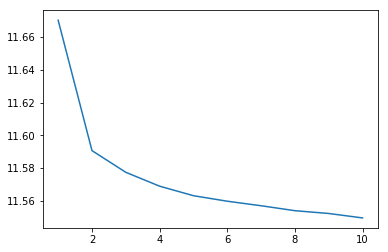

In [10]:
plt.plot(range(1, 11), hist.history['loss'])
plt.show()

In [11]:
score = model.evaluate(x, y)
score

1000/1000 [==============================] - 0s 94us/step


11.547369522094726

In [12]:
hist2 = model2.fit(x, y, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 0s 89us/step - loss: 11.6003
Epoch 2/10
1000/1000 [==============================] - 0s 24us/step - loss: 11.5604
Epoch 3/10
1000/1000 [==============================] - 0s 26us/step - loss: 11.5542
Epoch 4/10
1000/1000 [==============================] - 0s 22us/step - loss: 11.5519
Epoch 5/10
1000/1000 [==============================] - 0s 38us/step - loss: 11.5496
Epoch 6/10
1000/1000 [==============================] - 0s 24us/step - loss: 11.5477
Epoch 7/10
1000/1000 [==============================] - 0s 22us/step - loss: 11.5462
Epoch 8/10
1000/1000 [==============================] - 0s 23us/step - loss: 11.5446
Epoch 9/10
1000/1000 [==============================] - 0s 23us/step - loss: 11.5435
Epoch 10/10
1000/1000 [==============================] - 0s 21us/step - loss: 11.5420


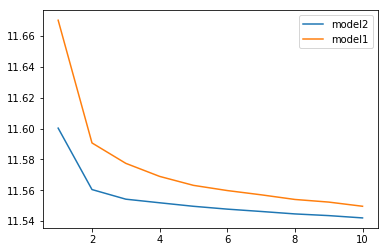

In [13]:
plt.plot(range(1, 11), hist2.history['loss'], label='model2')
plt.plot(range(1, 11), hist.history['loss'], label='model1')
plt.legend()
plt.show()

In [14]:
score2 = model2.evaluate(x, y)
score2

1000/1000 [==============================] - 0s 73us/step


11.539799514770507

## Multi-Input Models  
Assuming there are two input (question and reference text) has been given to model and it will return the answer

In [15]:
from keras import Sequential, models, Input
from keras import layers

In [16]:
text_vocab_size = 10000
ques_vocab_size = 10000
ans_vocab_size = 500

**Defining input for input text**

In [17]:
input_text = Input(shape=(None,),dtype='int32', name='text')
embeded_text = layers.Embedding(64, text_vocab_size)(input_text)
encoded_text = layers.LSTM(32)(embeded_text)

**Defining input for question**

In [18]:
input_ques = Input(shape=(None,), dtype='int32', name='ques')
embeded_ques = layers.Embedding(32, ques_vocab_size)(input_ques)
encoded_ques = layers.LSTM(16)(embeded_ques)

**Concatanating the input into one**

In [19]:
input_ = layers.concatenate([encoded_text, encoded_ques], axis=-1)

**Defining Output**

In [20]:
answer = layers.Dense(ans_vocab_size, activation='softmax')(input_)

**Defining Model**

In [21]:
model = models.Model([input_text, input_ques], answer)

**Compiling Model**

In [22]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

**Feeding data into model**

In [23]:
import numpy as np

In [24]:
num_samples = 1000
max_len = 100

In [25]:
input_text = np.random.randint(1, text_vocab_size, size=(num_samples, max_len))
input_ques = np.random.randint(1, ques_vocab_size, size=(num_samples, max_len))
answer = np.random.randint(0, 1, size=(num_samples, ans_vocab_size))

**Fitting the model**

In [26]:
hist = model.fit([input_text, input_ques], answer, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6010
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6010
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6010
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6010
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6010
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6010
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6010
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6010
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6010
Epoch 10/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - a

In [27]:
## Can use dictionary way as well
#hist = model.fit({input_text:input_text, input_ques:input_ques}, answer, epochs=10, batch_size=128)

## Multi-Output Models  
Assuming there are one input (image) has been given to model and it will return the age, income and gender

In [28]:
vocab_size = 50000
income_groups = 50

In [29]:
# Defining Input
posts_input = Input(shape=(None,), dtype='int32', name='posts')
embeded_posts = layers.Embedding(256, vocab_size)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embeded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

In [30]:
# Defining Outputs
age_pred = layers.Dense(1,  name='age')(x)
income_pred = layers.Dense(income_groups, activation='softmax', name='income')(x)
gender_pred = layers.Dense(1, activation='sigmoid', name='gender')(x)

In [31]:
# Defining Model
model2 = models.Model(posts_input, [age_pred, income_pred, gender_pred])
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 50000)  12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 128)    32000128    embedding_3[0][0]                
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, None, 128)    0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (

In [32]:
# Compiling Model with different losses and weightage
model2.compile(optimizer='rmsprop', 
              loss={'age':'mse',
                   'income':'categorical_crossentropy',
                   'gender':'binary_crossentropy'}, 
              loss_weights={'age':0.25,
                   'income':1.0,
                   'gender':10.0})

In [33]:
def get_one_hot(targets, nb_classes):
    """To generate one hot encoder"""
    return np.eye(nb_classes)[np.array(targets).reshape(-1)]

In [43]:
input_posts = np.random.randint(1, vocab_size, size=(num_samples, max_len))
output_age = np.random.randint(10, 100, size=(num_samples, ))
output_income = np.random.randint(1, income_groups, size=(num_samples, ))
one_hot_output = get_one_hot(output_income, income_groups)
output_gender = np.random.randint(0, 2, size=(num_samples,))

In [44]:
output_income[:3]

array([35, 18, 38])

In [45]:
one_hot_output[:3]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [46]:
output_gender[:3]

array([0, 0, 1])

In [47]:
output_gender[:3]

array([0, 0, 1])

In [48]:
input_posts[1]

array([ 2817,  6252,   659, 18130,  9888,  6469,  2447, 46692, 36762,
       35873,  9447, 12499, 21298, 30468, 40025, 17588, 11720, 36548,
       42938, 42902, 38105, 22476, 29557, 39767, 33971, 29113,  7921,
       22386, 40388,   992, 21953, 18627, 42606,  7782, 11199, 36273,
       43271,  1108, 27825, 31523,  3335, 46435, 16208, 40667, 37586,
        6027, 12927, 15258,  6683, 39852, 34761,  6255, 37059, 38226,
       35165, 26898, 27670, 19616, 21171, 14207, 33779, 15459, 21227,
       44632, 42014, 39968, 30989, 48748, 45770, 20108, 28276, 37946,
       25385, 24415, 12021, 29389, 47827,   851, 13177, 29787, 34974,
       48011, 43583, 39869,  5441, 33990, 49440, 42538,  2338, 33279,
        9130,  8930, 31868, 13960, 23327, 22788,  5467, 38555, 38655, 14384])

In [49]:
len(input_posts[1])

100

In [53]:
# Fitting the model

hist2= model2.fit(x=input_posts, y={'age':output_age, 'income':one_hot_output, 'gender':output_gender}, epochs=10, batch_size=64)

Epoch 1/10


InvalidArgumentError: computed output size would be negative
	 [[Node: conv1d_3/convolution/Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](conv1d_3/convolution/ExpandDims, conv1d_3/convolution/ExpandDims_1)]]
	 [[Node: loss_3/age_loss/Mean_3/_425 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_1800_loss_3/age_loss/Mean_3", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'conv1d_3/convolution/Conv2D', defined at:
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-099c4a01f3ed>", line 8, in <module>
    x = layers.Conv1D(256, 5, activation='relu')(x)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/keras/engine/topology.py", line 617, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/keras/layers/convolutional.py", line 160, in call
    dilation_rate=self.dilation_rate[0])
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 3294, in conv1d
    data_format=tf_data_format)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 661, in convolution
    op=op)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 331, in with_space_to_batch
    return op(input, num_spatial_dims, padding)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 653, in op
    name=name)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 114, in _non_atrous_convolution
    name=scope)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 2062, in conv1d
    data_format=data_format)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 403, in conv2d
    data_format=data_format, name=name)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sanmati/anaconda3/envs/fastai2/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): computed output size would be negative
	 [[Node: conv1d_3/convolution/Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](conv1d_3/convolution/ExpandDims, conv1d_3/convolution/ExpandDims_1)]]
	 [[Node: loss_3/age_loss/Mean_3/_425 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_1800_loss_3/age_loss/Mean_3", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
